<a href="https://colab.research.google.com/github/yousefMohamed2002/Level-2-Tasks---Codveda-Technology--ML-intern/blob/main/Task_1_Logistic_Regression_for_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coefficients: [[ 0.04184154  0.03502602 -0.06265417  0.76069025 -0.80983887  0.43705637
   0.37147797  0.05647042  0.3707335   0.12916029  0.03381153  0.12786169
   0.08074264 -0.07060454  0.07870941  0.11398457 -0.20666115  0.12341724
   0.7307695 ]]
Intercept: [-0.59912241]
Odds Ratios:
 [[1.04272923 1.03564666 0.93926825 2.13975268 0.44492975 1.54814335
  1.4498759  1.05809532 1.44879692 1.13787249 1.03438964 1.13639581
  1.08409186 0.93183032 1.08188989 1.12073484 0.81329519 1.13135637
  2.07667801]]
Accuracy: 0.7602996254681648
Precision: 0.34782608695652173
Recall: 0.7088607594936709
ROC AUC: 0.73904576436222

Feature Odds Ratios:
                   Feature  Odds Ratio
3       International plan    2.139753
18  Customer service calls    2.076678
5    Number vmail messages    1.548143
6        Total day minutes    1.449876
8         Total day charge    1.448797
9        Total eve minutes    1.137872
11        Total eve charge    1.136396
17       Total intl charge    1.131356
15  

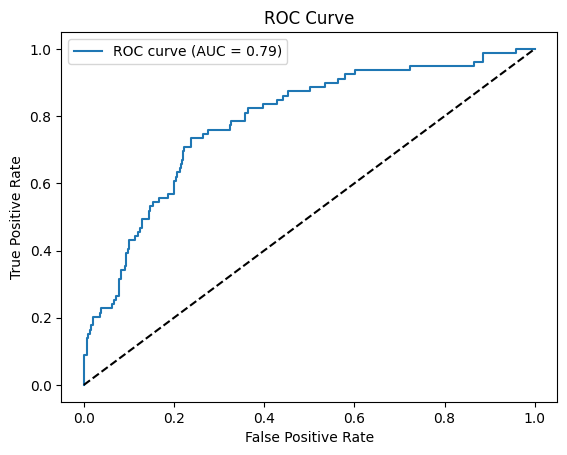

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA

df = pd.read_csv('/content/churn-bigml-80.csv')


le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


log_model = LogisticRegression(class_weight="balanced", max_iter=1000)
log_model.fit(X_train, y_train)


y_pred = log_model.predict(X_test)



print("Coefficients:", log_model.coef_)
print("Intercept:", log_model.intercept_)
print("Odds Ratios:\n", np.exp(log_model.coef_))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


odds_ratios = pd.DataFrame({
    "Feature": X.columns,
    "Odds Ratio": np.exp(log_model.coef_[0])
})
print("\nFeature Odds Ratios:")
print(odds_ratios.sort_values(by="Odds Ratio", ascending=False))

y_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

